In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Import the ground truth data
Ground_Truth = pd.read_csv('/Users/raymondblahajr/Desktop/PDS2.0/test_datafull.csv', index_col=0)

# Import the test data
Test_Data = pd.read_csv('/Users/raymondblahajr/Desktop/PDS2.0/Anomaly_Detections_Final.csv', index_col=0)

Ground_Truth.reset_index(inplace=True)
Test_Data.reset_index(inplace=True)


print(Ground_Truth.head())
print(Test_Data.head())

# Ensure that the date columns are in datetime format for both dataframes
Ground_Truth['time'] = pd.to_datetime(Ground_Truth['time'])
Test_Data['DateTime'] = pd.to_datetime(Test_Data['DateTime'])


# print all the instances of 1 in status column of Ground_Truth
print(Ground_Truth[Ground_Truth['status'] == 1].count())

# Filter anomalies detected by the model and the test data
anomalies_pred = Test_Data[Test_Data['Is_Anomaly']]
anomalies_test = Ground_Truth[Ground_Truth['status'] == 1]

# Print the number of anomalies detected by the model
print(anomalies_pred.count())



                        time  xrsa_flux  xrsb_flux  status flare_class  Sat
0  2020-12-27 07:22:00+00:00   0.000010   0.000060       0         NaN   17
1  2020-12-27 07:23:00+00:00   0.000012   0.000061       0         NaN   17
2  2020-12-27 07:24:00+00:00   0.000010   0.000061       0         NaN   17
3  2020-12-27 07:25:00+00:00   0.000013   0.000062       0         NaN   17
4  2020-12-27 07:26:00+00:00   0.000012   0.000062       0         NaN   17
                    DateTime  xrsa_flux  xrsb_flux         Error  Is_Anomaly
0  2020-12-27 07:22:00+00:00   0.000010   0.000060  4.106186e-07       False
1  2020-12-27 07:23:00+00:00   0.000012   0.000061  4.102358e-07       False
2  2020-12-27 07:24:00+00:00   0.000010   0.000061  4.103465e-07       False
3  2020-12-27 07:25:00+00:00   0.000013   0.000062  4.090379e-07       False
4  2020-12-27 07:26:00+00:00   0.000012   0.000062  4.084830e-07       False
time           6551
xrsa_flux      6551
xrsb_flux      6551
status         6551
fl

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1433453
           1       0.30      0.29      0.29      6547

    accuracy                           0.99   1440000
   macro avg       0.65      0.64      0.64   1440000
weighted avg       0.99      0.99      0.99   1440000

[[1428948    4505]
 [   4649    1898]]


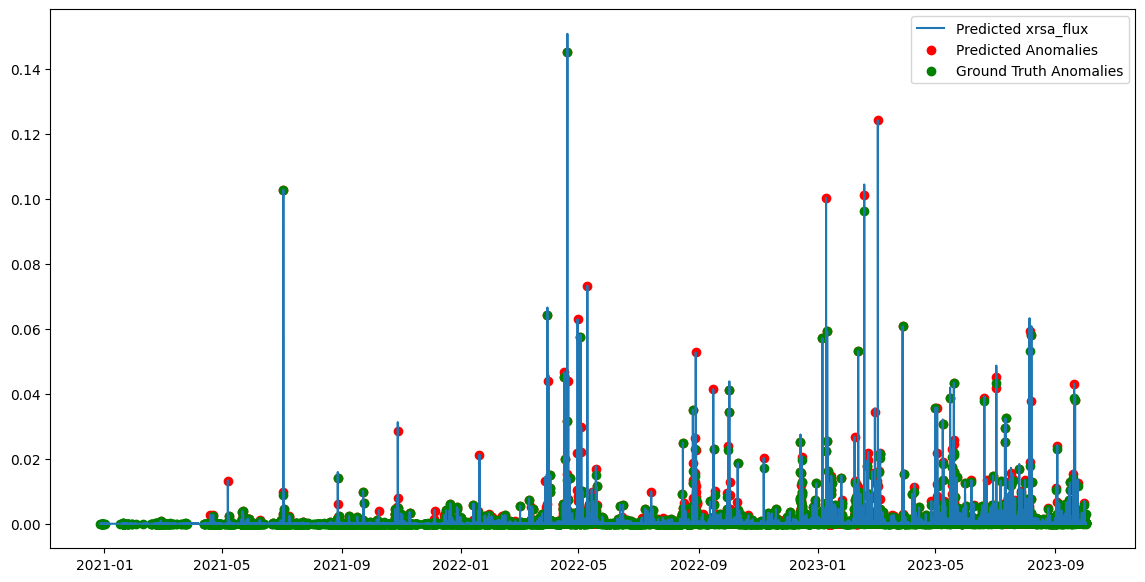

In [42]:
# Plot xrsa_flux from predictions where Is_Anomaly is True
plt.figure(figsize=(14, 7))
plt.plot(Test_Data['DateTime'], Test_Data['xrsa_flux'], label='Predicted xrsa_flux')
plt.scatter(anomalies_pred['DateTime'], anomalies_pred['xrsa_flux'], color='red', label='Predicted Anomalies')


# Trim the longer dataset to match the shorter one
if len(Ground_Truth) > len(Test_Data):
    Ground_Truth = Ground_Truth.iloc[:len(Test_Data)]
elif len(Test_Data) > len(Ground_Truth):
    Test_Data = Test_Data.iloc[:len(Ground_Truth)]

# Now that the lengths match, you can proceed to create the binary arrays again and compute the confusion matrix
ground_truth_labels = Ground_Truth['status'].values
predicted_labels = Test_Data['Is_Anomaly'].astype(int).values


# Compare accuracy of the model to the ground truth
print(classification_report(Ground_Truth['status'], Test_Data['Is_Anomaly']))
print(confusion_matrix(Ground_Truth['status'], Test_Data['Is_Anomaly']))

# Plot the ground truth anomalies
plt.scatter(anomalies_test['time'], anomalies_test['xrsa_flux'], color='green', label='Ground Truth Anomalies')
plt.legend()
plt.show()


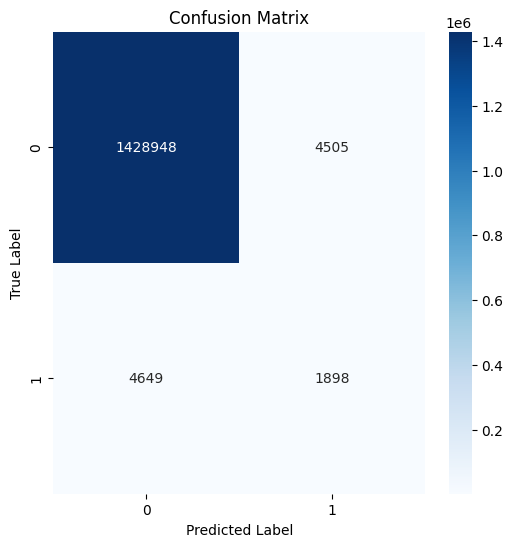

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Ground_Truth['status'], Test_Data['Is_Anomaly'].astype(int))

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


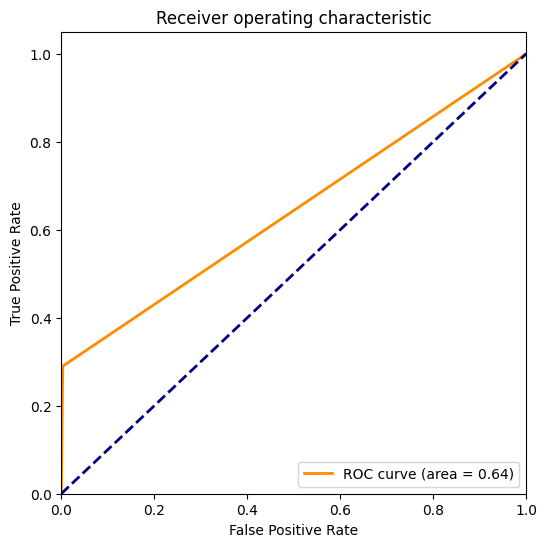

In [40]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Ground_Truth['status'], Test_Data['Is_Anomaly'].astype(int))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plot the random line
plt.xlim([0.0, 1.0]) # Set the x limits
plt.ylim([0.0, 1.05]) # Set the y limits
plt.xlabel('False Positive Rate') # Set the x label
plt.ylabel('True Positive Rate') # Set the y label
plt.title('Receiver operating characteristic') # Set the title
plt.legend(loc="lower right") # Set the legend
plt.show() # Show the plot


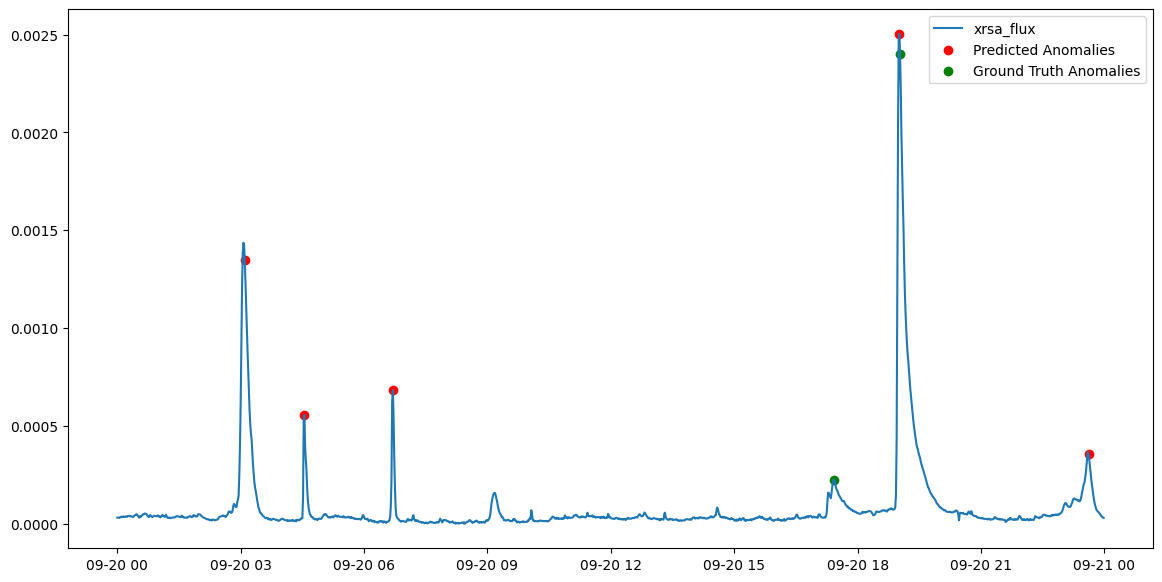

In [47]:
# Ensure that the date columns are in datetime format for both dataframes
Ground_Truth['time'] = Ground_Truth['time'].dt.tz_localize(None)
Test_Data['DateTime'] = Test_Data['DateTime'].dt.tz_localize(None)

# Filter for the specific date
specific_date = '2022-09-20'
start_date = pd.to_datetime(specific_date)
end_date = start_date + pd.Timedelta(days=1)

ground_truth_specific = Ground_Truth[(Ground_Truth['time'] >= start_date) & (Ground_Truth['time'] < end_date)]
test_data_specific = Test_Data[(Test_Data['DateTime'] >= start_date) & (Test_Data['DateTime'] < end_date)]

# Save these dataframes to csv files
ground_truth_specific.to_csv('ground_truth_specific.csv')
test_data_specific.to_csv('test_data_specific.csv')

# Plot the data for the specific date
plt.figure(figsize=(14, 7))
plt.plot(test_data_specific['DateTime'], test_data_specific['xrsa_flux'], label='xrsa_flux')
plt.scatter(test_data_specific[test_data_specific['Is_Anomaly']]['DateTime'], 
            test_data_specific[test_data_specific['Is_Anomaly']]['xrsa_flux'], color='red', label='Predicted Anomalies')
plt.scatter(ground_truth_specific[ground_truth_specific['status'] == 1]['time'], 
            ground_truth_specific[ground_truth_specific['status'] == 1]['xrsa_flux'], color='green', label='Ground Truth Anomalies')
plt.legend()
plt.show()

In [48]:
# Print the instances of 1 in the status column of the ground truth with other columns
print(ground_truth_specific[ground_truth_specific['status'] == 1])

# Print the instances of 1 in the Is_Anomaly column of the test data with other columns
print(test_data_specific[test_data_specific['Is_Anomaly']])

                      time  xrsa_flux  xrsb_flux  status flare_class  Sat
902614 2022-09-20 17:26:00   0.000224   0.001928       1        C2.8   17
902710 2022-09-20 19:02:00   0.002398   0.006987       1        M1.0   17
                  DateTime  xrsa_flux  xrsb_flux     Error  Is_Anomaly
901754 2022-09-20 03:06:00   0.001349   0.005355  0.000010        True
901841 2022-09-20 04:33:00   0.000557   0.002675  0.000002        True
901970 2022-09-20 06:42:00   0.000683   0.003182  0.000003        True
902709 2022-09-20 19:01:00   0.002504   0.006960  0.000021        True
902985 2022-09-20 23:37:00   0.000356   0.002365  0.000001        True
